In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [41]:
df=pd.read_csv('fraud loan prediction.csv')
pd.set_option('display.max_columns',None)

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
df.shape

(614, 13)

In [44]:
df.dtypes  #dependents columns is in object type but the data are numerical. 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

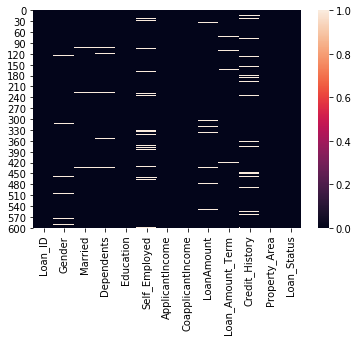

In [45]:
sns.heatmap(df.isnull())#there are missing values in the dataset

In [46]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Imputing missing values

In [48]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])    #numeric but treated as object.not changing dtype.
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [49]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
#outliers are present in some columns as difference between mean value and max value is very high.

# EDA

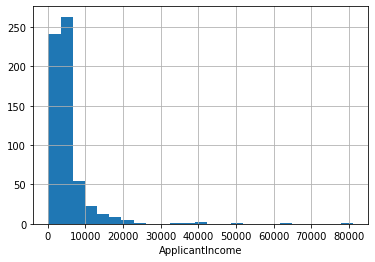

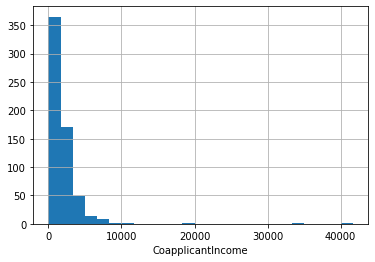

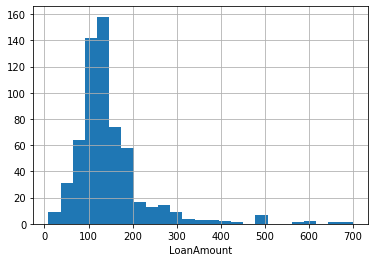

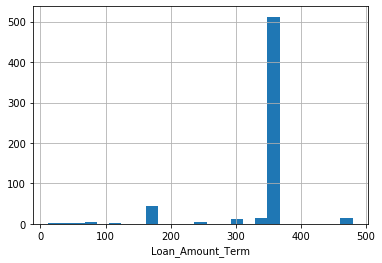

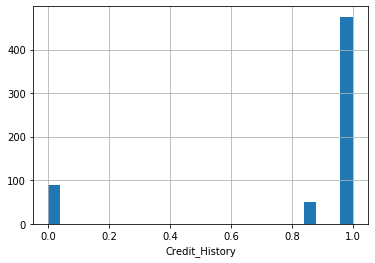

In [11]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

In [12]:
#checking relation of each attribute w.r.t target attribute

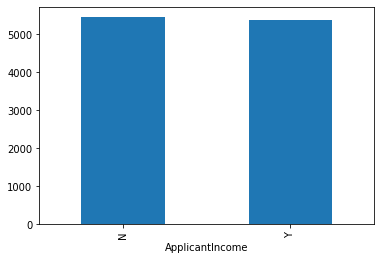

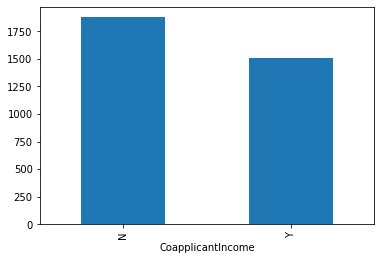

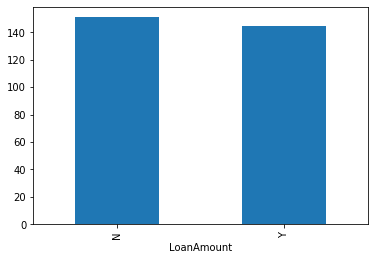

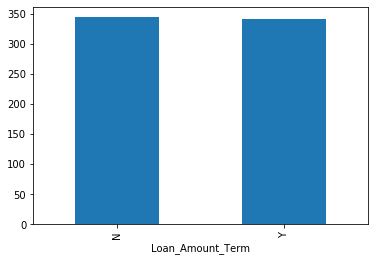

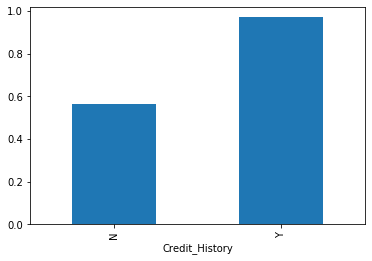

In [13]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df.groupby('Loan_Status')[feature].mean().plot.bar()
    plt.xlabel(feature)
    plt.show()


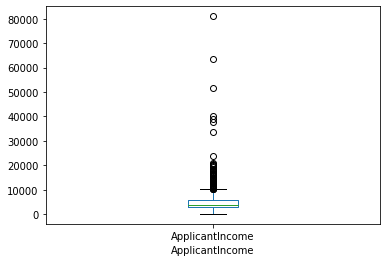

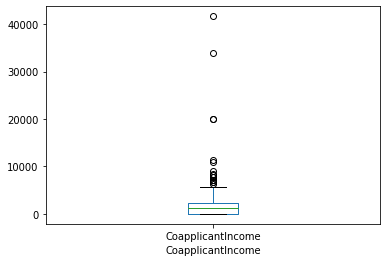

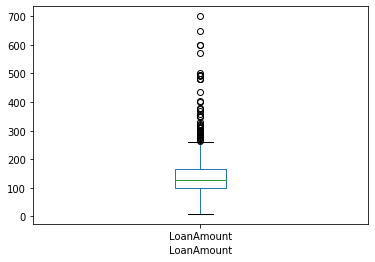

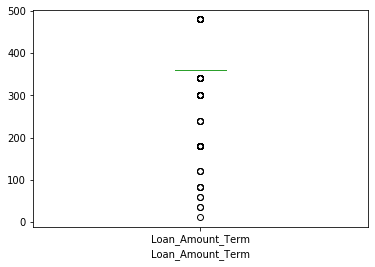

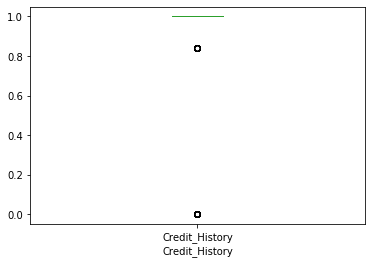

In [21]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

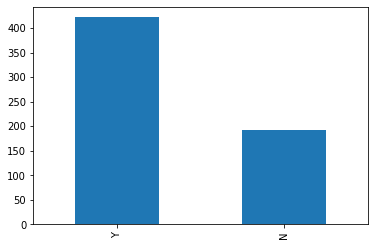

In [22]:
#checking if imbalanced dataset
df['Loan_Status'].value_counts().plot.bar()

# Feature Engineering

In [12]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']
for feature in categorical_features:
    if df[feature].nunique()>=2:
        print(feature,df[feature].nunique())

Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
Property_Area 3
Loan_Status 2


In [14]:
#Replacing instead of label encoding because we want Yes=1 & No=0
df['Loan_Status']=df['Loan_Status'].replace(['Y','N'],[1,0])

In [15]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# Making dummies

In [16]:
df=pd.concat([df,pd.get_dummies(df['Gender'],prefix=str('Gender'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Married'],prefix=str('Married'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Dependents'],prefix=str('Dependents'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Education'],prefix=str('Education'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Self_Employed'],prefix=str('Self_Employed'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Property_Area'],prefix=str('Property_Area'),prefix_sep='_')],axis=1)


In [17]:
#dropping columns as we have extracted data by dummies technique
df=df.drop(['Loan_ID','Married','Gender','Dependents','Education','Self_Employed','Property_Area'],axis=1)

In [18]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [19]:
df.corr()
##none of the negatively correlated columns with the target have very high values.no need to delete any column.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.004710,-0.058809,0.058809,-0.051708,0.051708,-0.092599,0.040861,-0.034650,0.156687,0.140760,-0.140760,-0.127180,0.127180,0.015829,-0.014246,-0.000598
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.059187,-0.082912,0.082912,-0.075948,0.075948,-0.008292,-0.029769,0.010016,0.041491,0.062290,-0.062290,0.016100,-0.016100,0.005329,-0.027044,0.022776
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.036416,-0.107930,0.107930,-0.147141,0.147141,-0.147688,0.062359,0.019547,0.153200,0.166998,-0.166998,-0.115260,0.115260,0.043178,-0.008273,-0.033220
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.020974,0.073567,-0.073567,0.100863,-0.100863,0.114757,-0.086946,-0.007786,-0.077071,0.077242,-0.077242,0.033943,-0.033943,0.034433,0.061365,-0.096683
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.540483,-0.012819,0.012819,-0.005852,0.005852,0.021128,0.002531,0.012462,-0.057859,0.077936,-0.077936,0.002260,-0.002260,-0.020132,0.040757,-0.022621
Loan_Status,-0.004710,-0.059187,-0.036416,-0.020974,0.540483,1.000000,-0.017987,0.017987,-0.091478,0.091478,-0.003044,-0.038740,0.062384,-0.026123,0.085884,-0.085884,0.003700,-0.003700,-0.100694,0.136540,-0.043621
Gender_Female,-0.058809,-0.082912,-0.107930,0.073567,-0.012819,-0.017987,1.000000,-1.000000,0.364569,-0.364569,0.148421,0.004466,-0.129953,-0.096319,0.045364,-0.045364,-0.000525,0.000525,-0.080283,0.108623,-0.034530
Gender_Male,0.058809,0.082912,0.107930,-0.073567,0.012819,0.017987,-1.000000,1.000000,-0.364569,0.364569,-0.148421,-0.004466,0.129953,0.096319,-0.045364,0.045364,0.000525,-0.000525,0.080283,-0.108623,0.034530
Married_No,-0.051708,-0.075948,-0.147141,0.100863,-0.005852,-0.091478,0.364569,-0.364569,1.000000,-1.000000,0.348175,-0.113853,-0.249547,-0.132566,0.012304,-0.012304,0.004489,-0.004489,0.006805,-0.005845,-0.000546
Married_Yes,0.051708,0.075948,0.147141,-0.100863,0.005852,0.091478,-0.364569,0.364569,-1.000000,1.000000,-0.348175,0.113853,0.249547,0.132566,-0.012304,0.012304,-0.004489,0.004489,-0.006805,0.005845,0.000546


# Removing outliers

In [20]:
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(614, 21)

In [21]:
df=df[(z<3).all(axis=1)]
df.shape

(533, 21)

# Separating target and independent variables

In [22]:
y=df['Loan_Status']
X=df.drop(['Loan_Status'],axis=1)

# Applying Power transformation to remove skewness

In [23]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [24]:
df.skew()

ApplicantIncome            0.030444
CoapplicantIncome         -0.218174
LoanAmount                 0.051538
Loan_Amount_Term           0.752711
Credit_History            -1.595095
Gender_Female              1.527956
Gender_Male               -1.527956
Married_No                 0.550175
Married_Yes               -0.550175
Dependents_0              -0.618210
Dependents_1               1.720230
Dependents_2               1.686243
Dependents_3+              0.000000
Education_Graduate        -1.359116
Education_Not Graduate     1.359116
Self_Employed_No          -2.264475
Self_Employed_Yes          2.264475
Property_Area_Rural        0.923885
Property_Area_Semiurban    0.525120
Property_Area_Urban        0.697164
dtype: float64

In [25]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.696805,-1.138223,0.334271,0.132534,0.514944,-0.495305,0.495305,1.311254,-1.311254,0.738192,-0.459743,-0.46572,0.0,0.530330,-0.530330,0.379179,-0.379179,-0.640354,-0.771886,1.406291
1,0.253190,0.723254,-0.001892,0.132534,0.514944,-0.495305,0.495305,-0.762629,0.762629,-1.354661,2.175128,-0.46572,0.0,0.530330,-0.530330,0.379179,-0.379179,1.561637,-0.771886,-0.711091
2,-0.502156,-1.138223,-1.430766,0.132534,0.514944,-0.495305,0.495305,-0.762629,0.762629,0.738192,-0.459743,-0.46572,0.0,0.530330,-0.530330,-2.637276,2.637276,-0.640354,-0.771886,1.406291
3,-0.764360,0.880271,-0.157373,0.132534,0.514944,-0.495305,0.495305,-0.762629,0.762629,0.738192,-0.459743,-0.46572,0.0,-1.885618,1.885618,0.379179,-0.379179,-0.640354,-0.771886,1.406291
4,0.743538,-1.138223,0.238336,0.132534,0.514944,-0.495305,0.495305,1.311254,-1.311254,0.738192,-0.459743,-0.46572,0.0,0.530330,-0.530330,0.379179,-0.379179,-0.640354,-0.771886,1.406291


# Scaling the Data

In [26]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(df)
x=pd.DataFrame(data=X_scaled,columns=df.columns)


In [27]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.696805,-1.138223,0.334271,0.132534,0.514944,-0.495305,0.495305,1.311254,-1.311254,0.738192,-0.459743,-0.46572,0.0,0.530330,-0.530330,0.379179,-0.379179,-0.640354,-0.771886,1.406291
1,0.253190,0.723254,-0.001892,0.132534,0.514944,-0.495305,0.495305,-0.762629,0.762629,-1.354661,2.175128,-0.46572,0.0,0.530330,-0.530330,0.379179,-0.379179,1.561637,-0.771886,-0.711091
2,-0.502156,-1.138223,-1.430766,0.132534,0.514944,-0.495305,0.495305,-0.762629,0.762629,0.738192,-0.459743,-0.46572,0.0,0.530330,-0.530330,-2.637276,2.637276,-0.640354,-0.771886,1.406291
3,-0.764360,0.880271,-0.157373,0.132534,0.514944,-0.495305,0.495305,-0.762629,0.762629,0.738192,-0.459743,-0.46572,0.0,-1.885618,1.885618,0.379179,-0.379179,-0.640354,-0.771886,1.406291
4,0.743538,-1.138223,0.238336,0.132534,0.514944,-0.495305,0.495305,1.311254,-1.311254,0.738192,-0.459743,-0.46572,0.0,0.530330,-0.530330,0.379179,-0.379179,-0.640354,-0.771886,1.406291


# Model Building

In [28]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [30]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [31]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.7388059701492538


cross_val_score  - 0.7093076385529216


roc_auc_score  - 0.614083398898505


Recall_score  - 0.9354838709677419


classification report
               precision    recall  f1-score   support

           0       0.67      0.29      0.41        41
           1       0.75      0.94      0.83        93

    accuracy                           0.74       134
   macro avg       0.71      0.61      0.62       134
weighted avg       0.72      0.74      0.70       134



[[12 29]
 [ 6 87]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    ker

cross_val_score  - 0.7939808095468474


roc_auc_score  - 0.7184631523734593


Recall_score  - 0.9247311827956989


classification report
               precision    recall  f1-score   support

           0       0.75      0.51      0.61        41
           1       0.81      0.92      0.86        93

    accuracy                           0.80       134
   macro avg       0.78      0.72      0.74       134
weighted avg       0.79      0.80      0.79       134



[[21 20]
 [ 7 86]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





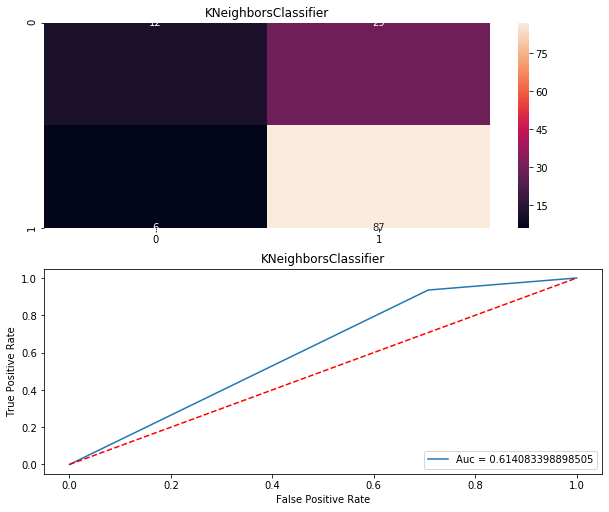

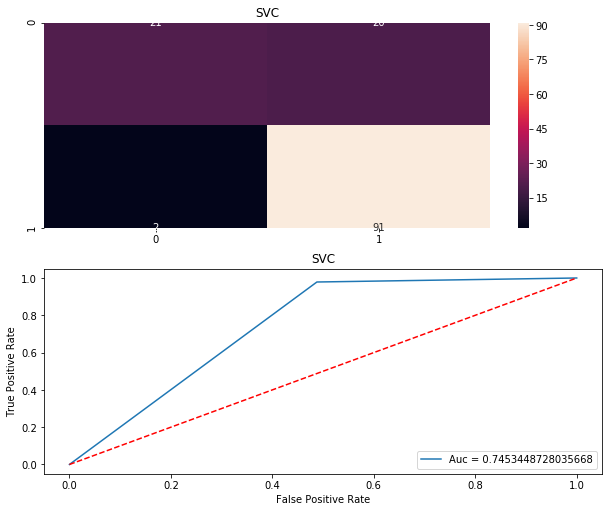

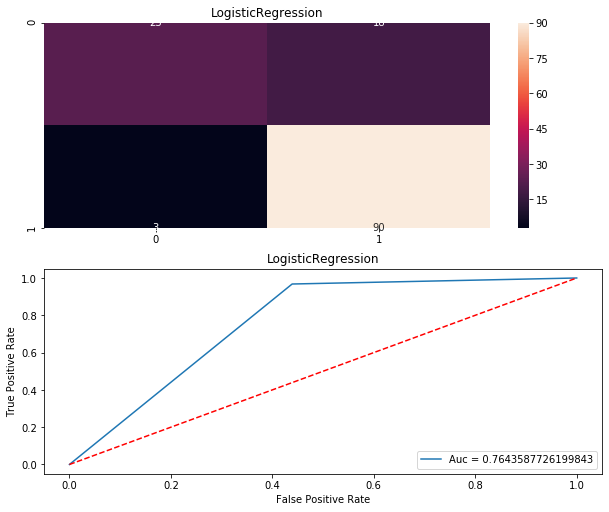

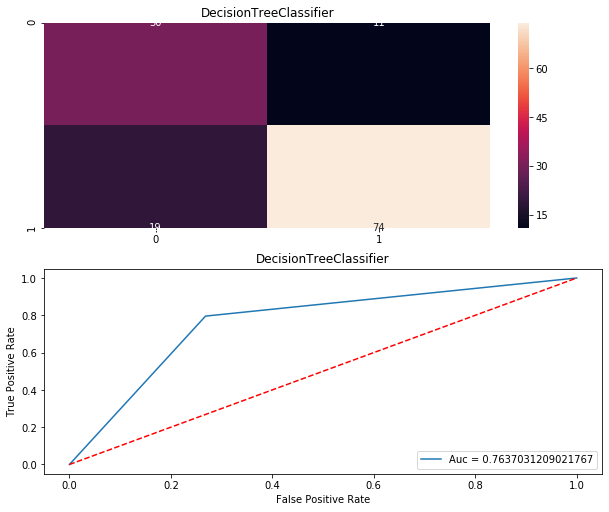

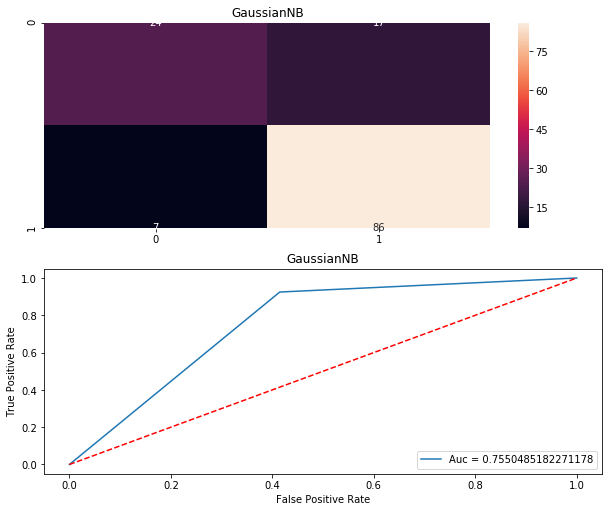

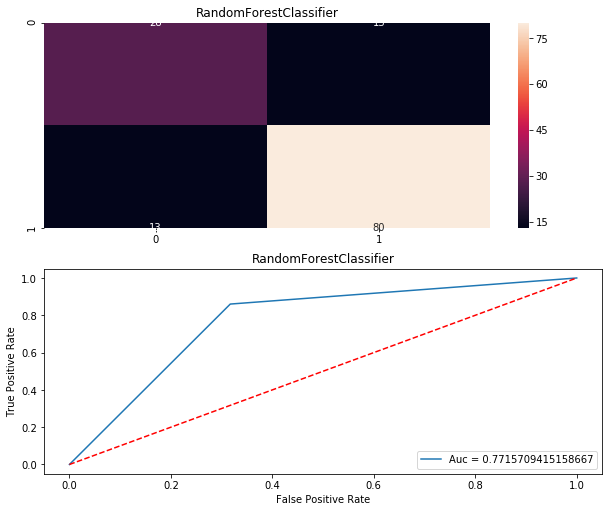

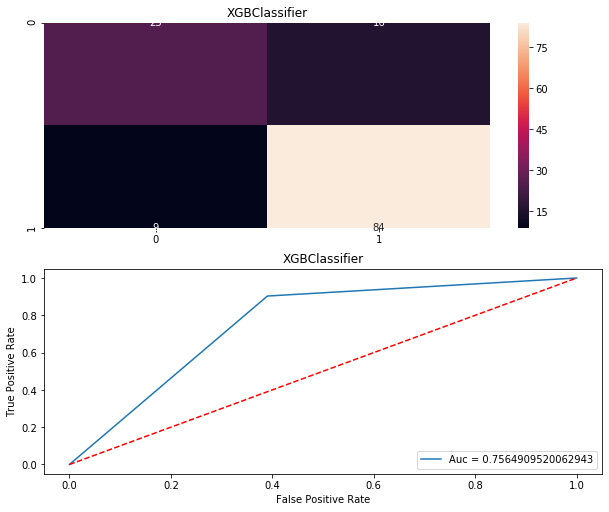

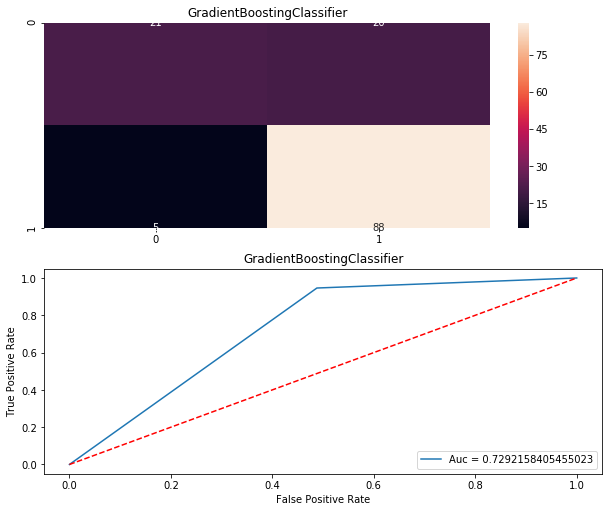

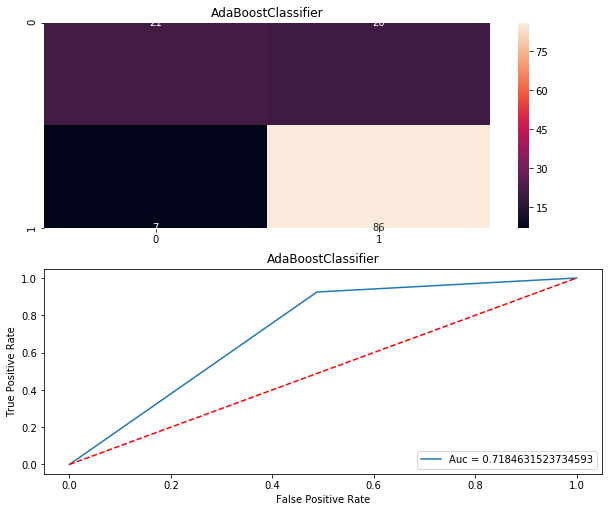

In [38]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    

In [39]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,73.880597,70.930764
1,SVC,83.582090,80.701365
2,LogisticRegression,84.328358,80.324007
3,DecisionTreeClassifier,77.611940,71.119981
4,GaussianNB,82.089552,75.809681
5,RandomForestClassifier,80.597015,76.172123
6,XGBClassifier,81.343284,76.570983
7,GradientBoostingClassifier,81.343284,78.842660
8,AdaBoostClassifier,79.850746,79.398081


In [40]:
#We can see from the table LogisticRegression is the best performing Algorithms.
#but our target accuracy score is 90%
#to improve the score we will apply gridsearchcv technique to the top the performing models.

In [41]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [43]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   76   which is   0.7761194029850746
knn 76
max_accuracy_score is at random_state   63   which is   0.8805970149253731
svc 63
max_accuracy_score is at random_state   63   which is   0.8656716417910447
lr 63
max_accuracy_score is at random_state   66   which is   0.8059701492537313
dt 66
max_accuracy_score is at random_state   42   which is   0.8208955223880597
gnb 42
max_accuracy_score is at random_state   63   which is   0.8507462686567164
rfc 63
max_accuracy_score is at random_state   46   which is   0.8432835820895522
xgb 46
max_accuracy_score is at random_state   63   which is   0.8731343283582089
gbc 63
max_accuracy_score is at random_state   63   which is   0.8955223880597015
ada 63


In [44]:
#We can see AdaBoostClassifier is performing the best at random_state=42
 
#selecting our top 4 models to be used for gridsearchcv

#model-1-->AdaBoostClassifier(accuracy=89.55%) at random_state=63
#model-2-->SVC(accuracy=88.05%) at random_state=63
#model-3-->GradientBoostingClassifier(accuracy=87.31%) at random_state=63
#model-4-->XGBoostClassifier(accuracy=84.32%) at random_state=46

# GridSearchCV

# model-1-->AdaBoostClassifier(accuracy=89.55%) at random_state=63

In [51]:
ada=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,stratify=y)

In [52]:
parameters=[{'base_estimator':[lr,xgb,gbc],'n_estimators':[100,250,500],'learning_rate':[0.1,0.001,1]}]
            
grid_search=GridSearchCV(ada,parameters,scoring='accuracy',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'learning_rate': 0.001,
 'n_estimators': 100}

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,stratify=y)
ada=AdaBoostClassifier(base_estimator=LogisticRegression(random_state=63),n_estimators=100,learning_rate=0.001)
ada.fit(x_train,y_train)
pred_ada=ada.predict(x_test)
score=accuracy_score(y_test,pred_ada)
print('Accuracy=  ',score)


Accuracy=   0.8582089552238806


In [52]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
ada=AdaBoostClassifier(base_estimator=LogisticRegression(random_state=63),n_estimators=100,learning_rate=0.001)
cvs=cross_val_score(ada,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(ada,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.7879661771250557


array([[ 87,  36],
       [ 77, 333]], dtype=int64)

# model-2-->SVC(accuracy=88.05%) at random_state=63

In [34]:
svc=SVC()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,stratify=y)

In [49]:
parameters=[{'C':[0.1,0.5,1,2],'kernel':['rbf','linear','poly']}]
            
grid_search=GridSearchCV(svc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'C': 0.5, 'kernel': 'rbf'}

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,stratify=y)
svc=SVC(C=0.5,kernel='rbf')
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
score=accuracy_score(y_test,pred_svc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8059701492537313


In [53]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
svc=SVC(C=0.5,kernel='rbf')
cvs=cross_val_score(svc,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(svc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8124432576769024


array([[ 79,  15],
       [ 85, 354]], dtype=int64)

# model-3-->GradientBoostingClassifier(accuracy=84%) at random_state=96

In [54]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=96,stratify=y)

In [55]:
parameters=[{'max_depth':[5,7,9,10],'learning_rate':[1,0.1,0.001],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(gbc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 1, 'max_depth': 9, 'n_estimators': 100}

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=96,stratify=y)
gbc=GradientBoostingClassifier(learning_rate=0.001,max_depth=5,n_estimators=500)
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
score=accuracy_score(y_test,pred_gbc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.7835820895522388


In [54]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
gbc=GradientBoostingClassifier(learning_rate=0.001,max_depth=5,n_estimators=500)
cvs=cross_val_score(gbc,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(gbc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8030618602581219


array([[ 67,   8],
       [ 97, 361]], dtype=int64)

# model-4-->XGBoostClassifier(accuracy=84.32%) at random_state=46

In [45]:
xgb=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)

In [46]:
parameters=[{'max_depth':[5,7,9,10],'learning_rate':[1,0.1,0.001]}]
            
grid_search=GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1, 'max_depth': 5}

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)
xgb=XGBClassifier(learning_rate=0.1,max_depth=5)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
score=accuracy_score(y_test,pred_xgb)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8134328358208955


In [55]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(learning_rate=0.1,max_depth=5)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.7899065420560747


array([[ 80,  28],
       [ 84, 341]], dtype=int64)

# Saving the SVC model

In [56]:
#From all the model tried above SVC model's has highest cross_val_score ,
#Hence saving the SVC model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,stratify=y)

svc=SVC(C=0.5,kernel='rbf')
svc.fit(x_train,y_train)
cvs=cross_val_score(svc,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(svc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8124432576769024


array([[ 79,  15],
       [ 85, 354]], dtype=int64)

In [38]:
from sklearn.externals import joblib
joblib.dump(svc,'project7-fraudloandetection.obj')

['project7-fraudloandetection.obj']

In [39]:
model=joblib.load('project7-fraudloandetection.obj')

In [40]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['Fraud yes(1)no(0)'])
Final_predictions[:5]

,Fraud yes(1)no(0)
0,1
1,1
2,1
3,1
4,0


# Saving final predictions in file.csv format

In [67]:
Final_predictions.to_csv('E:\\final_predictionsfraud.csv',index=False)

# Conclusion:-